## Wine Quality Prediction Project

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [1]:
# importing the dataset from local folder
import pandas as pd
df=pd.read_csv('wine_quality.csv')

In [10]:
 df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


* overall 1599 rows and 12 columns. The target variable is quality with integer data-type.
* All features are numeric with 11 float and 1 int target feature 

C:\Users\7EIN\AppData\Local\Temp\ipykernel_12388\695659995.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["quality"], palette="coolwarm")


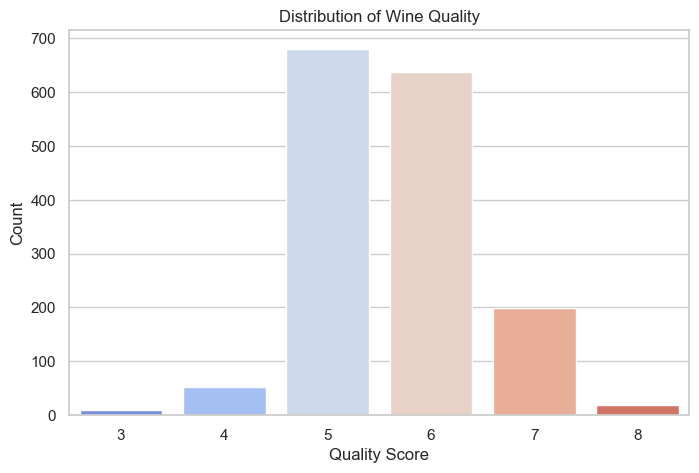

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Summary statistics
summary_stats = df.describe()

# Plot distribution of target variable (quality)
plt.figure(figsize=(8, 5))
sns.countplot(x=df["quality"], palette="coolwarm")
plt.title("Distribution of Wine Quality")
plt.xlabel("Quality Score")
plt.ylabel("Count")
plt.show()

summary_stats

* Most wines have a quality score of 5 or 6.
* Quality follows a nearly normal distribution but is slightly skewed.
* Some features like residual sugar, chlorides, and sulfur dioxide levels have large ranges, indicating possible outliers.
* Alcohol content ranges from 8.4% to 14.9%, with an average of ~10.4%.
* pH levels are centered around 3.31, indicating slight acidity.

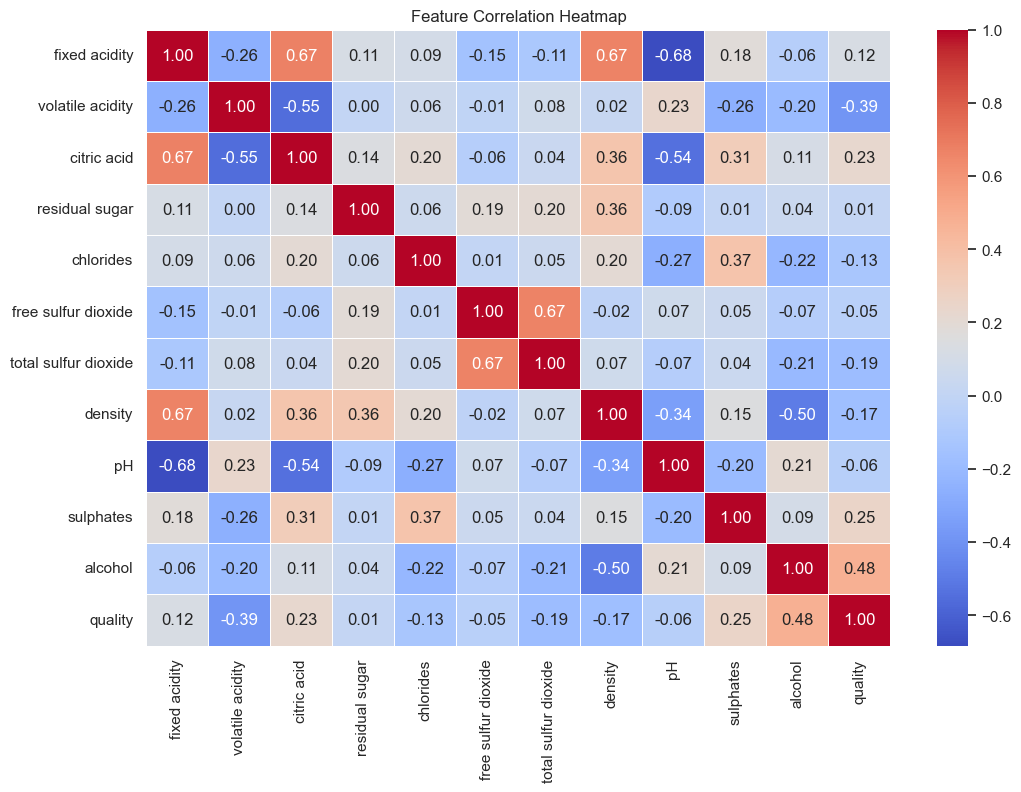

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

In [12]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Plot heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Check correlation of features with target variable (quality)
quality_correlation = correlation_matrix["quality"].sort_values(ascending=False)
quality_correlation

#### Positive Correlations:
* Higher alcohol content generally leads to better quality wines.
* Sulfates which influence antimicrobial properties have a moderate positive effect on quality.         
* Citric Acid as we can see the value is 0.23 which indicates it slightly improves wine quality.
#### Negative correlations:
* High volatile acidity negatively impacts quality (can cause an unpleasant vinegar taste).
* Higher SO₂ levels are associated with lower quality.
* Higher density wines tend to have lower quality.
* High chloride content (salt) slightly reduces quality.


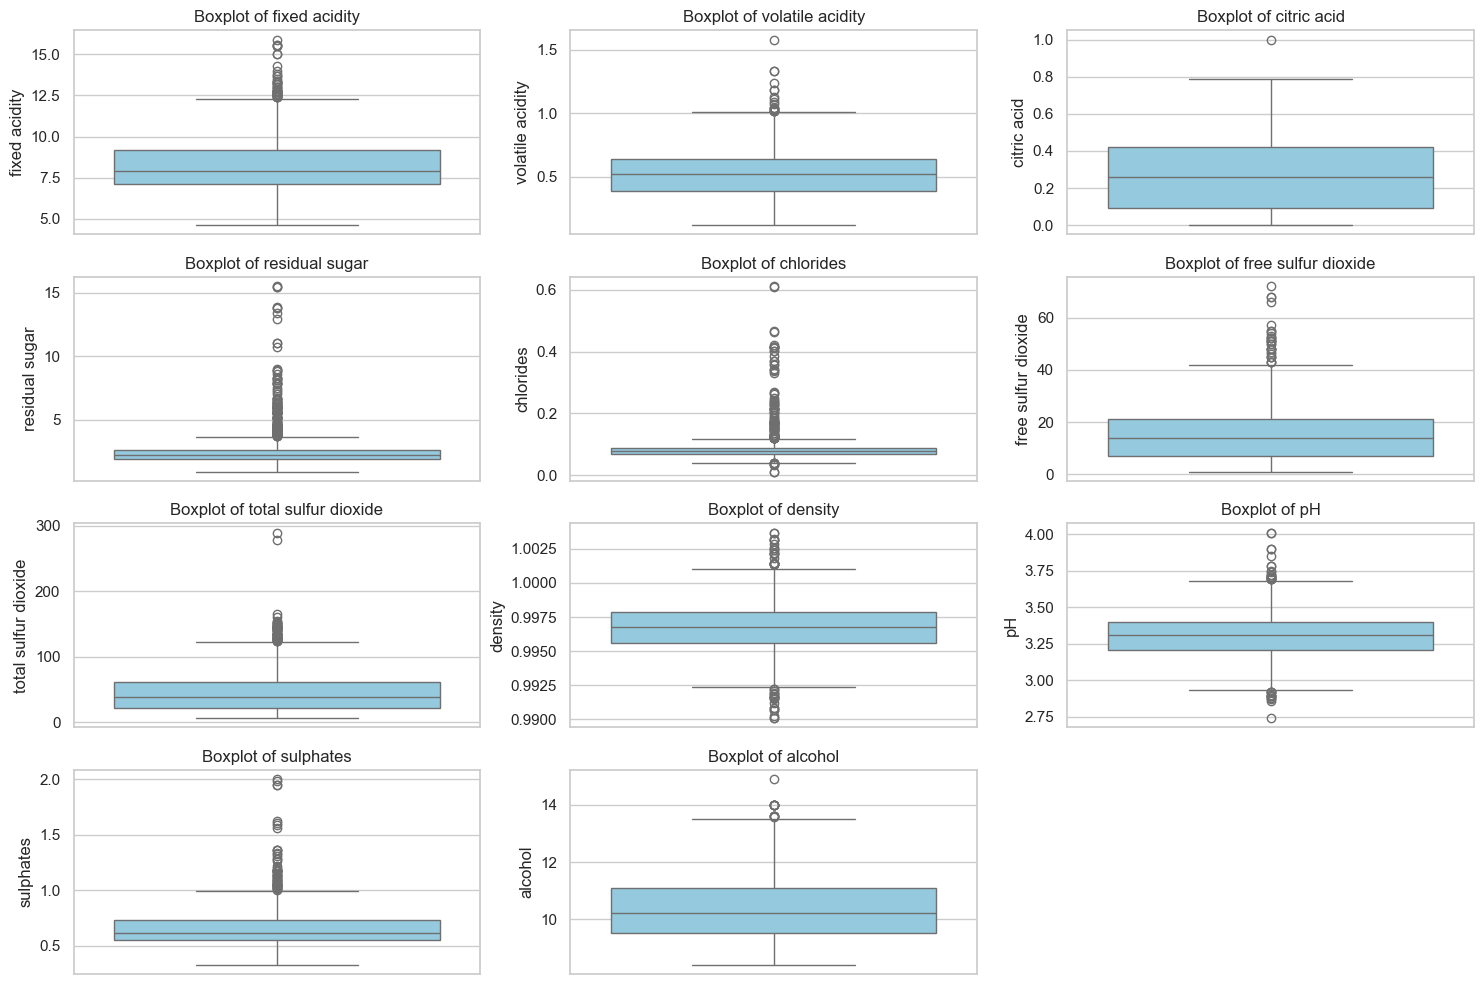

In [14]:
# Boxplots for outlier detection
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1], 1):  # Exclude quality column
    plt.subplot(4, 3, i)
    sns.boxplot(y=df[column], color="skyblue")
    plt.title(f"Boxplot of {column}")

plt.tight_layout()
plt.show()


In [16]:
# Function to remove outliers using IQR
def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtering data
    df_filtered = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
    
    return df_filtered

# Apply outlier removal
df_cleaned = remove_outliers_iqr(df)

# Display shape before and after removing outliers
print(f"Original dataset shape: {df.shape}")
print(f"After removing outliers: {df_cleaned.shape}")


Original dataset shape: (1599, 12)
After removing outliers: (1179, 12)


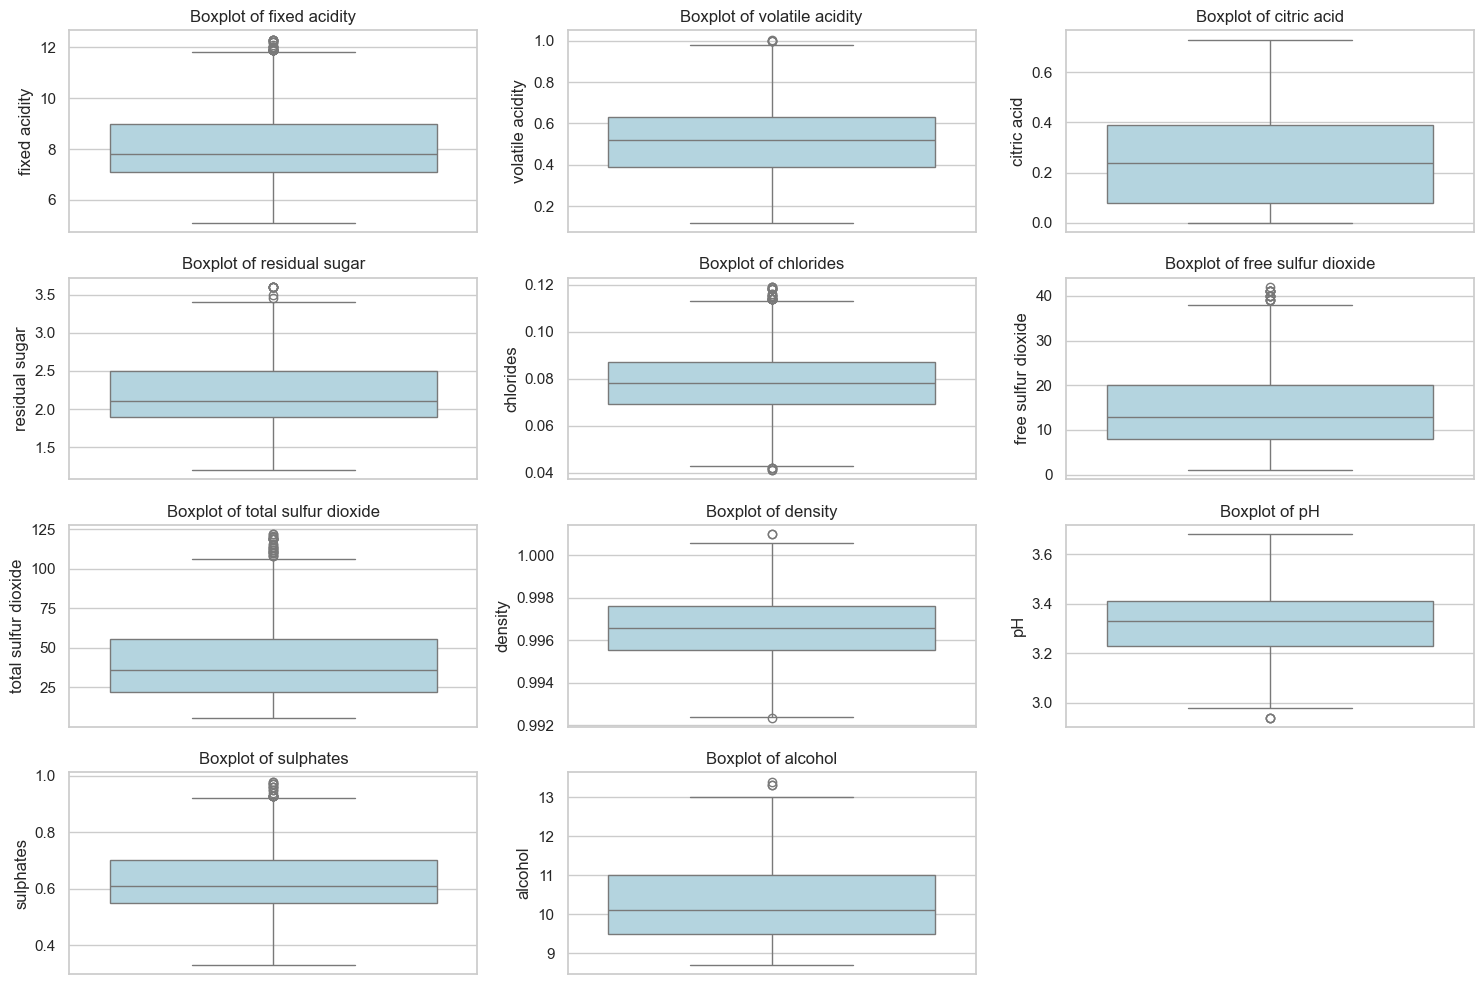

In [62]:
# Visualizing boxplots after outlier removal
plt.figure(figsize=(15, 10))
for i, column in enumerate(df_cleaned.columns[:-1], 1):  # Exclude 'quality' column
    plt.subplot(4, 3, i)
    sns.boxplot(y=df_cleaned[column], color="lightblue")
    plt.title(f"Boxplot of {column}")

plt.tight_layout()
plt.show()


* The IQR method effectively reduced extreme values from residual sugar, chlorides, and sulfur dioxide.
* Post-processing visualizations show a more normalized distribution, improving model performance.

In [17]:
from sklearn.preprocessing import StandardScaler

# Features and target variable
X = df_cleaned.drop("quality", axis=1)
y = df_cleaned["quality"]

# Apply Standard Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [18]:
from sklearn.feature_selection import mutual_info_classif

# Compute mutual information scores
mi_scores = mutual_info_classif(X_scaled, y)

# Create a DataFrame to display feature importance
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores}).sort_values(by="MI Score", ascending=False)

print(mi_df)


                 Feature  MI Score
10               alcohol  0.170950
7                density  0.117254
1       volatile acidity  0.106929
9              sulphates  0.102006
6   total sulfur dioxide  0.080835
2            citric acid  0.050107
8                     pH  0.041163
0          fixed acidity  0.036266
4              chlorides  0.030672
5    free sulfur dioxide  0.030542
3         residual sugar  0.000000


In [19]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (943, 11)
Testing set size: (236, 11)


In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings

In [27]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
}

In [40]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

print(results)


{'Logistic Regression': 0.6186440677966102, 'Random Forest': 0.7033898305084746, 'Gradient Boosting': 0.6610169491525424}


In [39]:
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print("The best model is",best_model_name)

The best model is Random Forest


In [34]:
# Hyperparameter tuning for best model (if RF or GB is best)
if best_model_name == "Random Forest":
    param_grid = {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5, 10],
    }
elif best_model_name == "Gradient Boosting":
    param_grid = {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 10],
    }
else:
    param_grid = {}

if param_grid:
    grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
else:
    best_params = "No tuning needed for Logistic Regression"

In [58]:
y_pred_final = best_model.predict(X_test)

* Accuracy Score

In [54]:
accuracy_final = accuracy_score(y_test, y_pred_final)
print(accuracy_final)

0.7033898305084746


* Confusion matrix

In [55]:
conf_matrix = confusion_matrix(y_test, y_pred_final)
print( conf_matrix)

[[ 0  3  3  0]
 [ 0 82 20  1]
 [ 0 25 69  6]
 [ 0  2 10 15]]


* The model predicts middle-range quality wines (5 and 6) well, but struggles with extreme values (4 and 7).
* The recall for class 4 is very low, meaning the model rarely classifies poor-quality wines correctly.

* Class Report

In [49]:
class_report = classification_report(y_test, y_pred_final)
print(class_report)

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.73      0.80      0.76       103
           6       0.68      0.69      0.68       100
           7       0.68      0.56      0.61        27

    accuracy                           0.70       236
   macro avg       0.52      0.51      0.51       236
weighted avg       0.68      0.70      0.69       236



* The model needs improvement for detecting low-quality wines (class 4).

* The important features for the prediction at last were:

In [60]:
feature_importance_df


,Feature,Importance
10,alcohol,0.159270
9,sulphates,0.124916
1,volatile acidity,0.104871
6,total sulfur dioxide,0.096467
7,density,0.095747
4,chlorides,0.082341
0,fixed acidity,0.072759
2,citric acid,0.071711
8,pH,0.068839
5,free sulfur dioxide,0.063086


* Alcohol(15.9%) is the most influential factor in predicting quality.
* Sulphates (12.5%) and volatile acidity (-10.5%) significantly impact wine quality.
* Total sulfur dioxide (9.6%) and density (9.5%) also play notable roles.


### Summary


#### This project aimed to predict red wine quality using EDA, feature engineering, outlier removal and machine learning models. After testing Logistic Regression, Random Forest, and Gradient Boosting, Random Forest performed best with 70% accuracy. Feature importance analysis highlighted alcohol, sulphates and volatile acidity as key predictors. The model effectively classifies mid-range quality wines (5 & 6) but struggles with extreme cases. Hyperparameter tuning improved performance and further refinements could focus on balancing classes and improving recall for poor-quality wines.

